In [2]:
using PyPlot

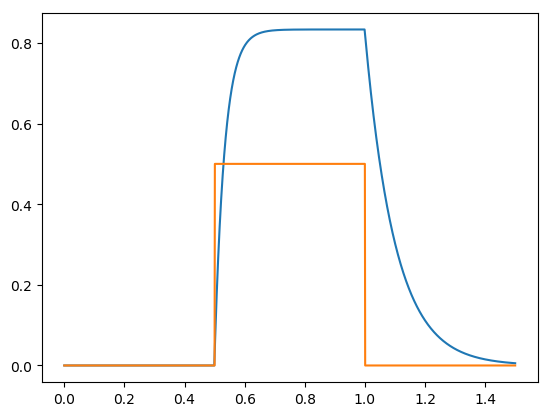

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43ba851e80>

In [77]:
include("Musclesim.jl")

F0 = 1
V_max = 10

start = 0
fin = 1.5
dt = 0.001
time = start:dt:fin

#parameters
a = zeros(length(time))
excitation = map(ms.excite, time)

#=
for i in 1:length(time) - 1
    a[i+1] = ms.RK4(a[i], ms.adot, time[i], dt)
end
=#
b = foldl((acc, t) -> vcat(acc, ms.RK4(acc[end], ms.adot, t, dt)), time)

function calcV_m(F_0, V_max, F_m, a, norm_L_m)
    y = F_m/(F_0*a*ms.norm_length_tension(norm_L_m))
    return V_max*norm_inv_fv(y)
end

plot(time, b[1:length(time)])
plot(time, excitation)


In [65]:
a

1×1502 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.00568098  0.00562445  0.00556849

$$
\begin{aligned}
F_m &= F_t                         \\
\dot{F}_m &= \dot{F}_t             \\
F_t &= K_t(L_t - L_{st})           \\
F_m &= A\cdot FV(V_m)\cdot LT(L_m) \\
L_T &= L_{mt} - L_m                \\
\tilde{F}_m &= \frac{F_m}{F_0}     \\
\tilde{L}_m &= \frac{L_m}{L_0}     \\
\tilde{V}_m &= \frac{V_m}{V_{max}} \\
\dot{a}(t) &= \frac{u(t)-a(t)}{\tau} \\
\dot{a}(t) &= \frac{u(t) - (\beta + (1 - \beta) u(t)) a(t)}{\tau} \\
\varepsilon &= \frac{L_t - L_{st}}{L_{st}} \\
LT\left(\frac{L}{L_0}\right) &= -3.0508\cdot \left(\frac{L}{L_0}\right)^2 + 5.9758\cdot \left(\frac{L}{L_0}\right) - 1.9597, 0.42 \le \frac{L}{L_0}\le1.54 \\
K_t &= \frac{F_0}{\varepsilon_{max}L_{st}} \\
\tilde{V}_m &= 0.995242\cdot e^{13.8817(F\tilde{V}-1.39214)} - 0.996815\cdot e^{-3.91442 F\tilde{V}}
\end{aligned}
$$

$L_{st}$ is the length of the slack tendon.
$a$ is muscle activation
$u$ is neural excitation
$\tau$ is time constant
$\varepsilon$ is tendon strain.

In [44]:
?foldl

search: foldl mapfoldl foldr mapfoldr



```
foldl(op, v0, itr)
```

Like [`reduce`](@ref), but with guaranteed left associativity. `v0` will be used exactly once.

```jldoctest
julia> foldl(-, 1, 2:5)
-13
```

```
foldl(op, itr)
```

Like `foldl(op, v0, itr)`, but using the first element of `itr` as `v0`. In general, this cannot be used with empty collections (see `reduce(op, itr)`).

```jldoctest
julia> foldl(-, 2:5)
-10
```
